# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


In [1]:
# Flora Wang

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [2]:
# Your code here 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [3]:
# Your code here
g = 9.8  # acceleration due to gravity in m/s^2
l = 1.0  # length of the pendulum in meters

print(g)
print(l)

9.8
1.0


Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [4]:
# Your code here
def pendulum(t, y):
    # y[0] is theta, y[1] is omega (angular velocity)
    theta, omega = y
    
    # the differential equations
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    
    return [dtheta_dt, domega_dt]

Give you equation some initial conditions. Run the cell below.

In [5]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

y0 = [theta_0, omega_0]

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

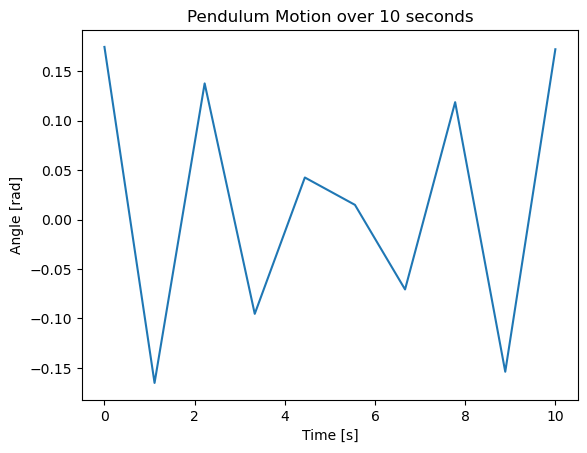

(array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 array([ 0.17453293, -0.16513036,  0.13765723, -0.09529893,  0.04252975,
         0.014868  , -0.07062516,  0.11868245, -0.15380881,  0.17217989]))

In [6]:
# Your code here
solution = solve_ivp(pendulum, [0, 10], y0, t_eval=np.linspace(0, 10, 10))

# plot and display output
plt.plot(solution.t, solution.y[0])
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.title("Pendulum Motion over 10 seconds")
plt.show()

solution.t, solution.y[0]

Extrac the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [7]:
# Your code here
theta_values = solution.y[0]  # xxtract the angle (theta) values
time_values = solution.t      # extract the time values

# print the extracted values
theta_values, time_values


(array([ 0.17453293, -0.16513036,  0.13765723, -0.09529893,  0.04252975,
         0.014868  , -0.07062516,  0.11868245, -0.15380881,  0.17217989]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]))

Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [8]:
# Your code here
# calculate the theoretical period using the small-angle approximation
T_theoretical = 2 * np.pi * np.sqrt(l / g)


Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [9]:
# Your code here
T_theoretical_two_sigfig = round(T_theoretical, 2) # round to 2 sig figs
print(T_theoretical_two_sigfig)

2.01


Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [10]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

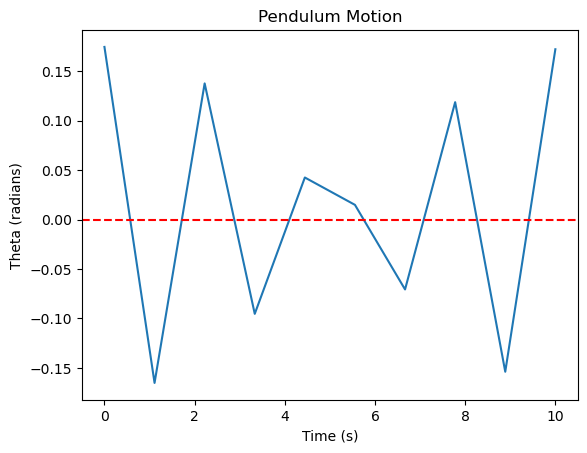

In [11]:
# Your code here
# plot the pendulum motion
plt.plot(time_values, theta_values)

# add horizontal line at y=0
plt.axhline(0, color='r', linestyle='--')

# labeling axes and adding title
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Pendulum Motion")

# show plot
plt.show()


Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [12]:
# Your code here
T_numerical_four_sigfig = round(T_numerical, 4)
print(T_numerical_four_sigfig)

2.2222


Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

In [13]:
# It has a 10% error

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [14]:
# Your code here
import pandas as pd

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

In [15]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [16]:
# Your code here
df = pd.read_csv('owid-covid-data.csv')
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [17]:
# Your code here
df_country = df[df['location'] == 'United States'] # select US using "location" and create df_country

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In [18]:
# Your code here
df_country_relevant = df_country[['date', 'total_cases']].dropna() # select columns and drop other

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [20]:
df_country.loc[:,'days_since_start'] = range(len(df_country)) # count the number of days

# an error occurred for this, so I searched and added .loc without quite knowing its meaning.

Print the first few rows of your `df_country` dataframe.

In [21]:
# Your code here
print(df_country.head())

       iso_code      continent       location        date  total_cases  \
403451      USA  North America  United States  2020-01-05          0.0   
403452      USA  North America  United States  2020-01-06          0.0   
403453      USA  North America  United States  2020-01-07          0.0   
403454      USA  North America  United States  2020-01-08          0.0   
403455      USA  North America  United States  2020-01-09          0.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
403451        0.0                 NaN           0.0         0.0   
403452        0.0                 NaN           0.0         0.0   
403453        0.0                 NaN           0.0         0.0   
403454        0.0                 NaN           0.0         0.0   
403455        0.0                 NaN           0.0         0.0   

        new_deaths_smoothed  ...  handwashing_facilities  \
403451                  NaN  ...                     NaN   
403452                  NaN  ...

In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [22]:
# Your code here
import numpy as np
from scipy.optimize import curve_fit

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [23]:
# Your code here
def exponential_growth(t, C_0, r):
    return C_0 * np.exp(r * t) # return the resulting C

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [24]:
# Your code here
days = df_country['days_since_start'].iloc[:30].values
cases = df_country['total_cases'].iloc[:30].values

With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [25]:
# Your code here
params, covariance = curve_fit(exponential_growth, days, cases, p0=[1, 0.1])

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [26]:
# Your code here
C0_fit, r_fit = params

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [27]:
# Your code here
print(round(C0_fit, 2))
print(round(r_fit, 4))

0.12
0.1538


Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [28]:
# Your code here
import matplotlib.pyplot as plt

future_days = np.arange(0, 61)  # From 0 to 60 (inclusive)

Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [29]:
# Your code here 
predicted_cases = exponential_growth(future_days, C0_fit, r_fit)

**Scater** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

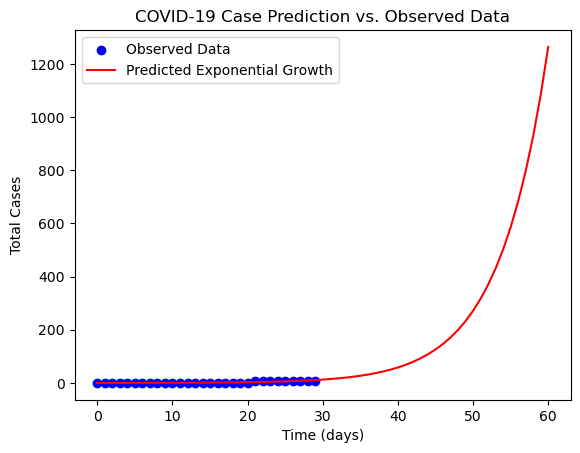

In [30]:
# Your code here
plt.scatter(days, cases, label="Observed Data", color="blue")
plt.plot(future_days, predicted_cases, label="Predicted Exponential Growth", color="red")

# add labels, title, and legend
plt.xlabel("Time (days)")
plt.ylabel("Total Cases")
plt.title("COVID-19 Case Prediction vs. Observed Data")
plt.legend()

# show the plot
plt.show()

How well does your exponential model fit the actual COVID-19 data? 

In [31]:
# Your comment here
# For the existing data, it fits well.

Make another plot but this time to **90 days**.

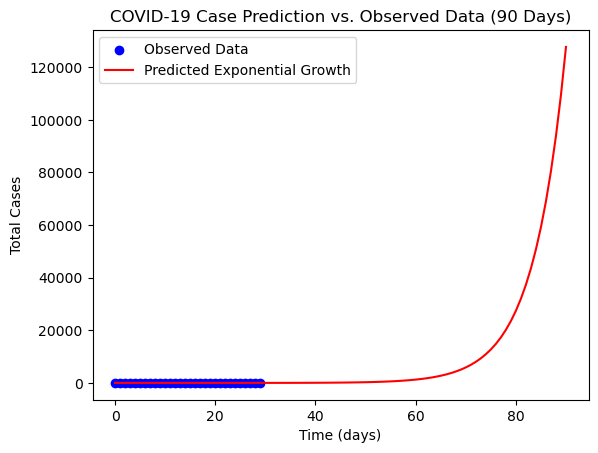

In [32]:
# Your code here
# prediction range to 90 days
future_days = np.arange(0, 91)

# predict the cases for the extended range
predicted_cases = exponential_growth(future_days, C0_fit, r_fit)

# scatter plot the observed data and plot the predicted cases
plt.scatter(days, cases, label="Observed Data", color="blue")
plt.plot(future_days, predicted_cases, label="Predicted Exponential Growth", color="red")

# add labels, title, and legend
plt.xlabel("Time (days)")
plt.ylabel("Total Cases")
plt.title("COVID-19 Case Prediction vs. Observed Data (90 Days)")
plt.legend()

# show the plot
plt.show()

What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [33]:
# Your code here
print(exponential_growth(87, C0_fit, r_fit))

80497.10645252101


## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

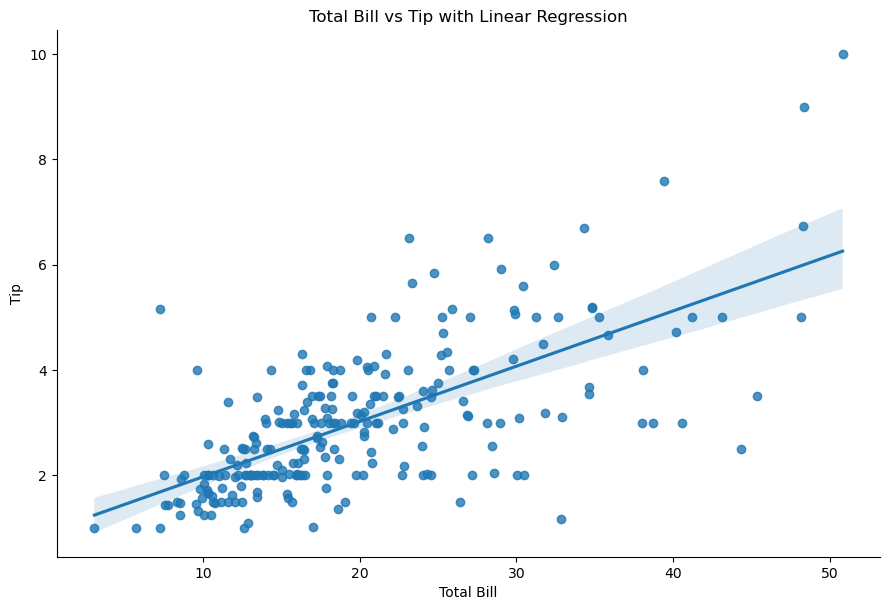

In [34]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# load "tips" dataset
tips = sns.load_dataset('tips')

# create scatter plot with regression line
sns.lmplot(x='total_bill', y='tip', data=tips, aspect=1.5, height=6)

# add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip with Linear Regression')

# show plot
plt.show()

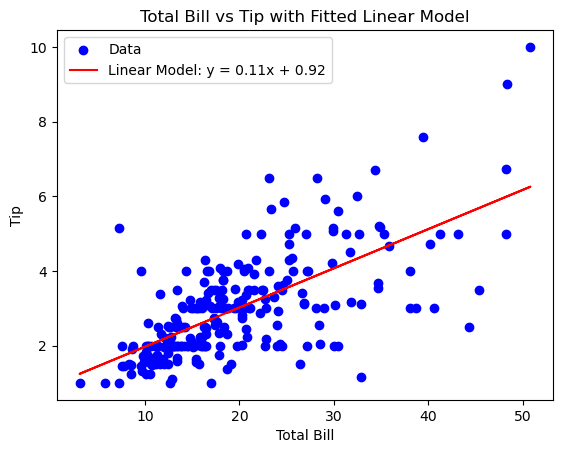

In [35]:
# fit a linear regression model using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(tips['total_bill'], tips['tip'])

# create regression
x_values = tips['total_bill']
y_values = slope * x_values + intercept

# plot data and regression
plt.scatter(tips['total_bill'], tips['tip'], color='blue', label='Data')
plt.plot(x_values, y_values, color='red', label=f'Linear Model: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip with Fitted Linear Model')
plt.legend()
plt.show()

On it's own branch, submit this notebook to Gradescope! 